In [34]:
import torch
from UNet import UNet
import os

# Load the saved model checkpoint
model_path = "C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\\project_2\\test\\UNet_4lev_Dice_norm_augmV2_79epochs.pth"
checkpoint = torch.load(model_path)

# Extract the model state, normalization parameters, and best loss
model_state_dict = checkpoint['model_state_dict']
mean             = checkpoint['mean']
std              = checkpoint['std']
loss             = checkpoint['loss']

# Load the model state
model = UNet()
model.load_state_dict(model_state_dict)
model.eval()

C:\Users\Gauthier\AppData\Local\Temp\ipykernel_23908\2847978145.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


UNet(
  (down_conv_0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (pool_0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down_conv_1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down_conv_2): Sequential(
 

In [50]:
from torchvision import transforms
from PIL import Image
import cv2

# Charger l'image satellite
# image_path = "C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\project_2\\test\\original_data\\images\\satImage_064.png"
# true_mask_path = "C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\\project_2\\test\\original_data\\groundtruth\\satImage_064.png"
image_path = "C:\\Users\\Gauthier\\Desktop\\EPFL\\Master\\Machine Learning\\projet\\project_2\\test\\test_set_images\\test_49\\test_49.png"
image = Image.open(image_path).convert("RGB")  
# true_mask = cv2.imread(true_mask_path, cv2.IMREAD_GRAYSCALE)

transform = transforms.Compose([
    transforms.Resize((256, 256)),  
    transforms.ToTensor(),   
    transforms.Normalize(mean=mean, std=std) 
])

# [ Mean : tensor([0.3331, 0.3301, 0.2961], device='cuda:0') ]   |   [ Std : tensor([0.1622, 0.1563, 0.1554], device='cuda:0') ]

input_image = transform(image).unsqueeze(0)  # Ajouter une dimension batch [1, C, H, W]

In [51]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_model = model.to(device)
input_image = input_image.to(device)

# make a prediction
with torch.no_grad():
    output = model(input_image) 
    prediction = torch.sigmoid(output).squeeze(0)
    binary_mask = prediction > 0.1
    

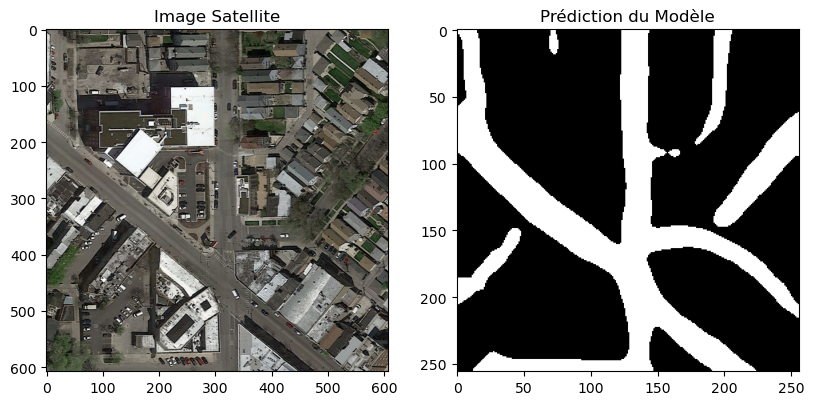

In [52]:
import matplotlib.pyplot as plt

# Convertir le masque en numpy pour l'afficher
binary_mask_np = binary_mask.cpu().numpy()
binary_mask_np = binary_mask_np.squeeze(0)

# Afficher l'image originale et la prédiction
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Image Satellite")
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.title("Prédiction du Modèle")
plt.imshow(binary_mask_np, cmap="gray")
# plt.subplot(1, 3, 3)
# plt.title("Ground truth")
# plt.imshow(true_mask, cmap="gray")
plt.show()